In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.decomposition import PCA
from sklearn import preprocessing

import datetime
from datetime import datetime, date
import pandas_datareader as pdr

In [3]:
data = pd.read_csv('glass.csv')

In [28]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [29]:
data.drop(columns='Type')

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.00,0.00
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.00,0.00
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.00,0.00
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.00,0.11


2.zadatak

In [4]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [5]:
data.shape

(214, 10)

In [6]:
data.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [119]:
from sklearn.preprocessing import StandardScaler

In [120]:
X_std=StandardScaler().fit_transform(X)

In [121]:
X_std=pd.DataFrame(X_std)

In [122]:
X_std.columns=X.columns

In [124]:
X_std.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451


3.zadatak

In [14]:
data_scaled = preprocessing.scale(data)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


In [15]:
pca = PCA()
pca.fit(data_scaled)
pca_data = pca.transform(data_scaled)

In [16]:
variation_pct = np.round(pca.explained_variance_ratio_ * 100, decimals=2)
labels = ['PC' + str(x) for x in range(1, len(variation_pct) + 1)]

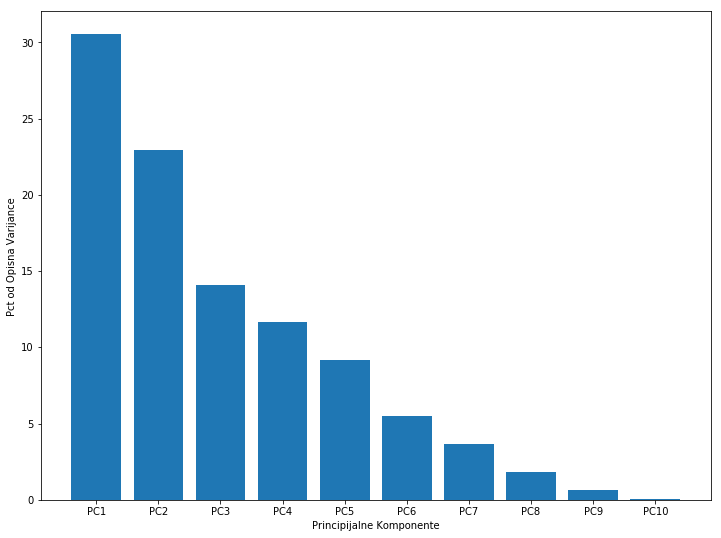

In [32]:
plt.figure(figsize=(12, 9))
plt.bar(x=range(1, len(variation_pct) + 1), height = variation_pct, tick_label = labels)
plt.ylabel('Pct od Opisna Varijance ')
plt.xlabel('Principijalne Komponente');

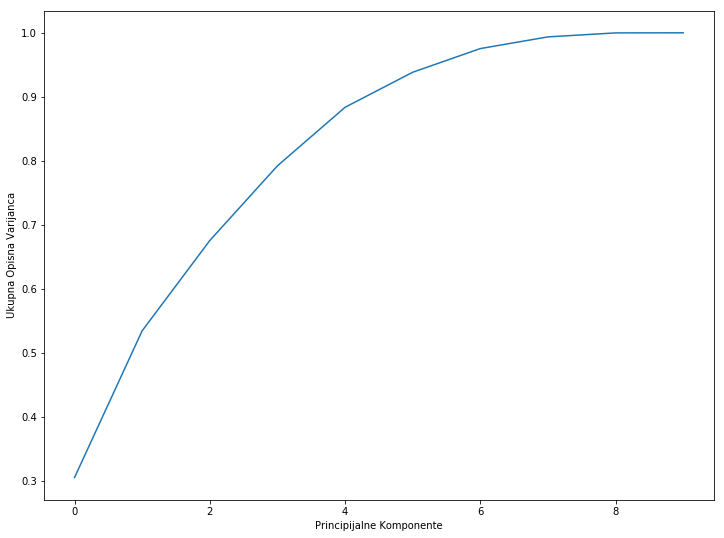

In [31]:
plt.figure(figsize=(12, 9))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principijalne Komponente')
plt.ylabel('Ukupna Opisna Varijanca');

Pogledamo li graf jasno dolazimo do zaključka da nam trebaju 4 principalne komponente kako bismo imali ukupnu opisnu varijancu veću od 80%.

# 5.ishod

In [33]:
def get_stock_data(ticker, start, end): return pdr.get_data_yahoo(ticker, start, end)

In [35]:
start_date = datetime(year=2015, month=1, day=1)
end_date = datetime(year=2017, month=5, day=9)

aapl_data = get_stock_data('AAPL', start_date, end_date)


In [36]:
aapl_data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,111.440002,107.349998,111.389999,109.330002,53204600.0,101.138702
2015-01-05,108.650002,105.410004,108.290001,106.250000,64285500.0,98.289474
2015-01-06,107.430000,104.629997,106.540001,106.260002,65797100.0,98.298729
2015-01-07,108.199997,106.699997,107.199997,107.750000,40105900.0,99.677094
2015-01-08,112.150002,108.699997,109.230003,111.889999,59364500.0,103.506897


In [38]:
aapl_data.dtypes

High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Adj Close    float64
dtype: object

In [39]:
aapl_data.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2017-04-26', '2017-04-27', '2017-04-28', '2017-05-01',
               '2017-05-02', '2017-05-03', '2017-05-04', '2017-05-05',
               '2017-05-08', '2017-05-09'],
              dtype='datetime64[ns]', name='Date', length=592, freq=None)

index je već postavljen na DatetimeIndex

In [40]:
aapl_week_monday = pd.DataFrame (aapl_data['Adj Close'].resample('W-MON').mean())

In [41]:
aapl_week_monday.head()

,Adj Close
Date,
2015-01-05,99.714088
2015-01-12,101.233069
2015-01-19,100.100302
2015-01-26,103.007362
2015-02-02,107.149863


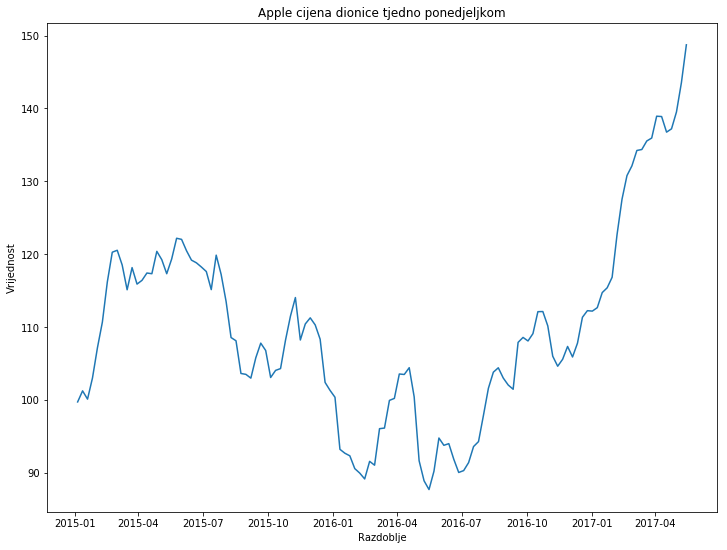

In [43]:
plt.figure(figsize=(12, 9))

plt.plot(aapl_week_monday['Adj Close'])

plt.xlabel('Razdoblje')
plt.ylabel('Vrijednost')
plt.title('Apple cijena dionice tjedno ponedjeljkom');

# 6.ishod

In [48]:
aapl_data['Change'] = aapl_data['Adj Close'] / aapl_data['Adj Close'].shift(1) - 1

In [49]:
aapl_data.head()

,High,Low,Open,Close,Volume,Adj Close,Change
Date,,,,,,,
2015-01-02,111.440002,107.349998,111.389999,109.330002,53204600.0,101.138702,NaN
2015-01-05,108.650002,105.410004,108.290001,106.250000,64285500.0,98.289474,-0.028171
2015-01-06,107.430000,104.629997,106.540001,106.260002,65797100.0,98.298729,0.000094
2015-01-07,108.199997,106.699997,107.199997,107.750000,40105900.0,99.677094,0.014022
2015-01-08,112.150002,108.699997,109.230003,111.889999,59364500.0,103.506897,0.038422


In [53]:
desc_var=[]

for i in aapl_data['Change']:
    if i > 0: 
        desc_var.append('UP')
    elif i < 0:
        desc_var.append('DOWN')
        
    else: desc_var.append('NO CHANGE')
        
aapl_data['desc_var']=desc_var



In [54]:
aapl_data['Stock Status'] = desc_var

In [58]:
aapl_data.head(30)

,High,Low,Open,Close,Volume,Adj Close,Change,desc_var,Stock Status
Date,,,,,,,,,
2015-01-02,111.440002,107.349998,111.389999,109.330002,53204600.0,101.138702,NaN,NO CHANGE,NO CHANGE
2015-01-05,108.650002,105.410004,108.290001,106.250000,64285500.0,98.289474,-0.028171,DOWN,DOWN
2015-01-06,107.430000,104.629997,106.540001,106.260002,65797100.0,98.298729,0.000094,UP,UP
2015-01-07,108.199997,106.699997,107.199997,107.750000,40105900.0,99.677094,0.014022,UP,UP
2015-01-08,112.150002,108.699997,109.230003,111.889999,59364500.0,103.506897,0.038422,UP,UP
2015-01-09,113.250000,110.209999,112.669998,112.010002,53699500.0,103.617920,0.001073,UP,UP
2015-01-12,112.629997,108.800003,112.599998,109.250000,49650800.0,101.064705,-0.024641,DOWN,DOWN
2015-01-13,112.800003,108.910004,111.430000,110.220001,67091900.0,101.962006,0.008878,UP,UP
2015-01-14,110.489998,108.500000,109.040001,109.800003,48956600.0,101.573509,-0.003810,DOWN,DOWN


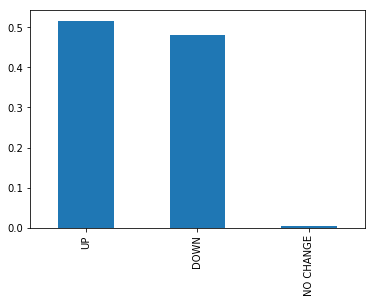

In [72]:
aapl_data['desc_var'].value_counts('Stock Status').plot.bar()

2.zadatak

In [107]:
end_of_month = aapl_data['Adj Close'].asfreq('M').ffill()

In [108]:
aapl_monthly = pd.DataFrame()
aapl_monthly['Adj Close'] = end_of_month


In [110]:
aapl_monthly.head()

,Adj Close
Date,
2015-01-31,NaN
2015-02-28,NaN
2015-03-31,115.561661
2015-04-30,116.230362
2015-05-31,116.230362


In [111]:
aapl_monthly['Monthly Return'] = end_of_month / end_of_month.shift(1) - 1

In [112]:
return_vals = []
for val in aapl_monthly['Monthly Return'].fillna(0):
    if val == 0.0: return_vals.append('SAME')
    elif val < 0.0: return_vals.append('DOWN')
    else: return_vals.append('UP')

In [113]:
aapl_monthly['Stock Status'] = return_vals

In [114]:
aapl_monthly.head()

,Adj Close,Monthly Return,Stock Status
Date,,,
2015-01-31,NaN,NaN,SAME
2015-02-28,NaN,NaN,SAME
2015-03-31,115.561661,NaN,SAME
2015-04-30,116.230362,0.005787,UP
2015-05-31,116.230362,0.000000,SAME


In [115]:
aapl_data['Stock Status'].value_counts(normalize=True) * 100

UP           51.689189
DOWN         47.972973
NO CHANGE     0.337838
Name: Stock Status, dtype: float64

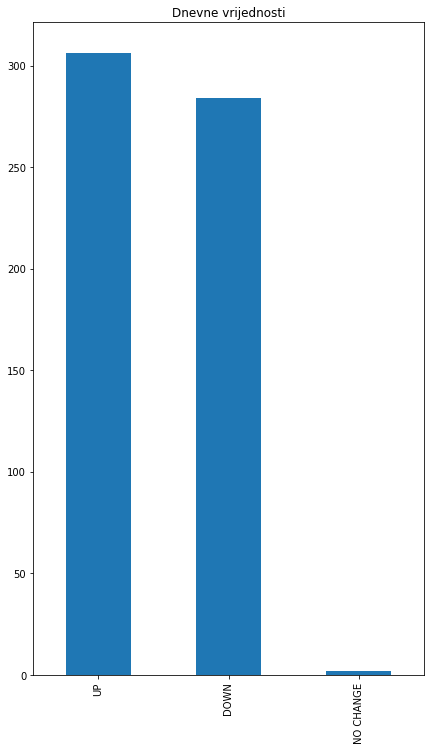

In [116]:
plt.figure(figsize=(7, 12))
aapl_data['Stock Status'].value_counts().plot.bar()
plt.title('Dnevne vrijednosti');

In [117]:
aapl_monthly['Stock Status'].value_counts(normalize=True) * 100

UP      35.714286
SAME    35.714286
DOWN    28.571429
Name: Stock Status, dtype: float64

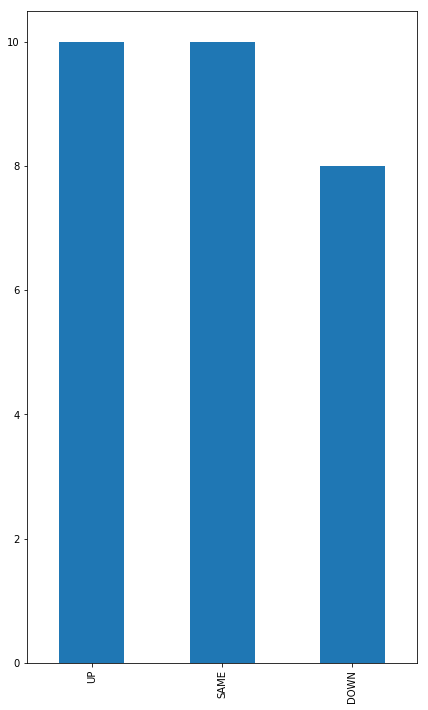

In [118]:
plt.figure(figsize=(7, 12))
aapl_monthly['Stock Status'].value_counts().plot.bar()
